
# Project: Investigate Wine Quality Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
###### There are two datasets that provide information on samples of red and white variants of the Portuguese "Vinho Verde" wine. Each sample of wine was rated for quality by wine experts and examined with physicochemical tests. Due to privacy and logistic issues, only data on these physicochemical properties and quality ratings are available



#### Questions we are trying to answer:  
###### 1 - What chemical characteristics are most important in predicting the quality of wine? 
###### 2 - Is a certain type of wine (red or white) associated with higher quality?
###### 3- Do wine with higher alcoholic content receive better rating?
###### 4- Do sweeter wines (more residual sugar) receive better rating?
###### 5 -what level of acidity is associate with the highest quality?



In [1]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load  data.
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')
# print out a few lines of the data!
red_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#number of samples and columns in red wine dataset
print(red_df.shape)
# print out a few lines of the data!
red_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#number of samples and columns in white wine dataset
print(white_df.shape)
# print out a few lines of the data!
white_df.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#features with missing values in red wine dataset
red_df.isnull().sum()
#there is no missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#features with missing values in red white dataset
white_df.isnull().sum()
#there is no missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#duplicate rows in the red wine dataset
red_df.duplicated().sum()
#not necessary to drop it

240

In [8]:
#duplicate rows in the white wine dataset
white_df.duplicated().sum()
#not necessary to drop it

937

In [9]:
#number of unique values for quality in red wine dataset
red_df.quality.nunique()

6

In [10]:
#number of unique values for quality in white wine dataset
white_df.quality.nunique()

7

In [11]:
#mean density of the red wine datase
red_df.density.mean()

0.9967466791744833

In [12]:
#mean density of the red white datase
white_df.density.mean()

0.9940273764801896

### Data Cleaning (Replace this with more specific notes!)

In [13]:
# replace spaces with underscores  for red dataframe
red_df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

# confirm changes
red_df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# replace spaces with underscores  for white dataframe
white_df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

# confirm changes
white_df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [15]:
# create color array for red dataframe
color_red =np.repeat('red', red_df.shape[0])

# create color array for white dataframe
color_white =np.repeat('white', white_df.shape[0])

In [16]:
#Add arrays to the red dataframes
red_df['color'] = color_red
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [17]:
#Add arrays to the white dataframes
white_df['color'] = color_white
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [18]:
# append dataframes
wine_df = red_df.append(white_df)

# view dataframe to check for success
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [19]:
wine_df.to_csv('winequality_edited.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

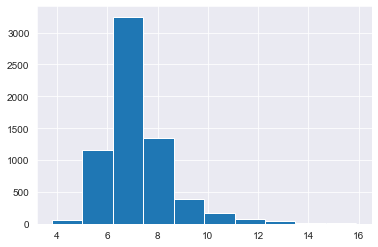

In [20]:
# Load dataset
df = pd.read_csv('winequality_edited.csv')

#Histograms for Various Features
df.fixed_acidity.hist();

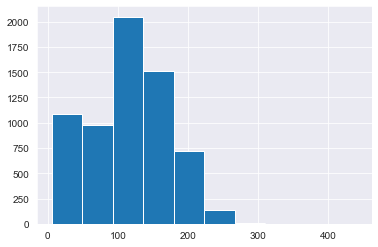

In [21]:
df.total_sulfur_dioxide.hist();

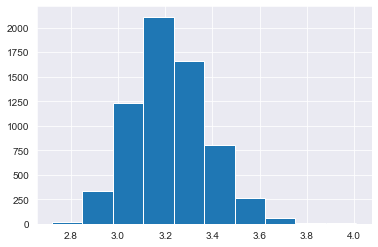

In [22]:
df.pH.hist();

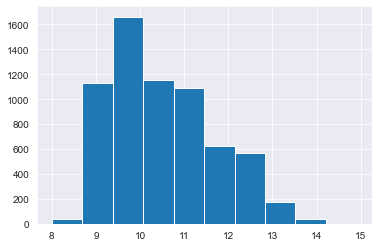

In [23]:
df.alcohol.hist();

### 1- What chemical characteristics are most important in predicting the quality of wine? 


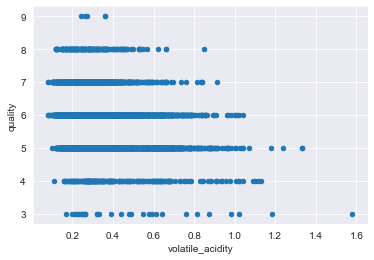

In [24]:
#Scatterplots of Quality Against Various Features
df.plot(x="volatile_acidity", y="quality", kind="scatter");

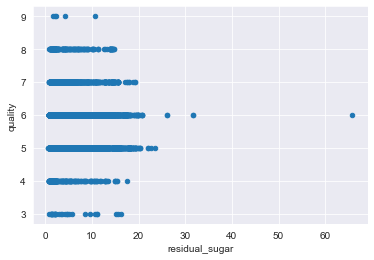

In [25]:
df.plot(x="residual_sugar", y="quality", kind="scatter");

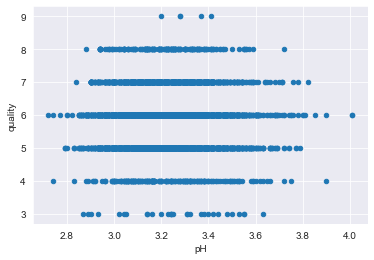

In [26]:
df.plot(x="pH", y="quality", kind="scatter");

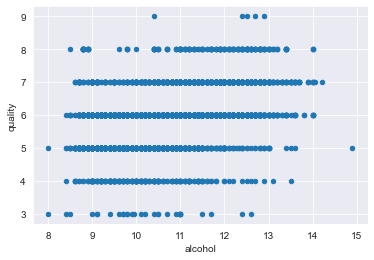

In [27]:
df.plot(x="alcohol", y="quality", kind="scatter");

# Drawing Conclusions Using Groupby


### 2- Is a certain type of wine associated with higher quality?

In [28]:
# Find the mean quality of each wine type (red and white) with groupby
df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [29]:
# get counts for each rating and color
color_counts = df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [30]:
# get total counts for each color
color_totals =df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [31]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [32]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

we're missing a red wine value for a the 9 rating. Even though this number is a 0, we need it for our plot. Run the last two cells after running the cell below.

In [33]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

### Plot proportions on a bar chart
x coordinate location for each rating group and and width of each bar.

In [34]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
print(ind)
width = 0.35       # the width of the bars

[0 1 2 3 4 5 6]


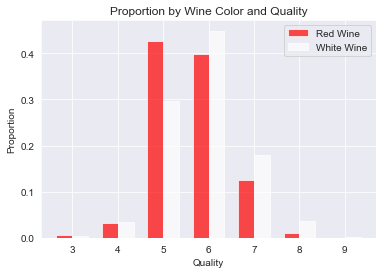

In [35]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.xlabel('Quality')
plt.ylabel('Proportion')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

### 3- Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [36]:
# get the median amount of alcohol content
median = df['alcohol'].median()

# select samples with alcohol content less than the median
low_alcohol= df.query('alcohol < {}'.format(median))

# select samples with alcohol content greater than or equal to the median
high_alcohol = df.query('alcohol >= {}'.format(median))

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True


True

In [37]:
# get mean quality rating for the low alcohol and high alcohol groups
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

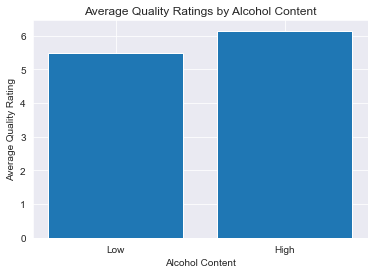

In [38]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

In [39]:
# print mean quality rating for the low alcohol and high alcohol groups
mean_quality_low,mean_quality_high

(5.475920679886686, 6.146084337349397)

### 4- Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [40]:
# get the median amount of residual sugar

median =df.residual_sugar.median()

# select samples with residual sugar less than the median
low_sugar= df.query('residual_sugar < {}'.format(median))

# select samples with residual sugar greater than or equal to the median
high_sugar  = df.query('residual_sugar >= {}'.format(median))

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True # should be True


True

In [41]:
# get mean quality rating for the low sugar and high sugar groups
low_quality_mean = low_sugar['quality'].mean()
high_quality_mean = high_sugar['quality'].mean()

Text(0, 0.5, 'average quality ratings')

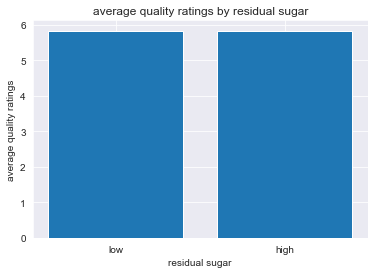

In [42]:
# Create a bar chart with proper labels
locations = [1,2]
heights = [low_quality_mean,high_quality_mean]
labels =['low','high']
plt.bar(locations,heights,tick_label=labels);
plt.title('average quality ratings by residual sugar')
plt.xlabel('residual sugar')
plt.ylabel('average quality ratings')


In [43]:
# print mean quality rating for the low sugar and high sugar groups
low_quality_mean,high_quality_mean

(5.808800743724822, 5.82782874617737)

### 5- What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [44]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df.pH.describe()


count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [45]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [46]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [47]:
# Creates acidity_levels column
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [48]:
# Find the mean quality of each acidity level with groupby
df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

In [49]:
 #mean quality for each acidity level
quality_means=df.groupby('acidity_levels').quality.mean()

Text(0, 0.5, 'average quality ratings')

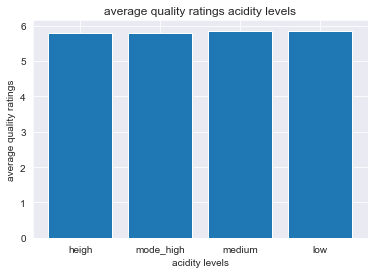

In [50]:
# Create a bar chart with proper labels
locations =[1,2,3,4]
labels =['heigh','mode_high','medium','low']

plt.bar(locations,quality_means,tick_label=labels)
plt.title('average quality ratings acidity levels')
plt.xlabel('acidity levels')
plt.ylabel('average quality ratings')


In [51]:
# Save changes for the next section
df.to_csv('winequality_edited.csv', index=False)

In [52]:
# Load dataset
df =pd.read_csv('winequality_edited.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,mod_high
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,high
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,low


<a id='conclusions'></a>
## Conclusions

• Based on scatterplots of quality against different feature variables,Alcohol is most likely to have a positive impact on quality.


•The analysis indicates that the mean quality of red wine less than white wine.


• It is obvious that wines with higher alcoholic content receive better ratings.

• Also ssweeter wines (more residual sugar) receive better ratings

• Low level of acidity ( 75% - max pH value) receives the highest average rating.


